In [11]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [12]:
#   Read raw data
data_path = 'datasets\CIC IoT 2023\\'
file = 'part-00113-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'  # largest file in datasets
df = pd.read_csv(data_path+file)

In [13]:
single_value_cols = []
def is_unique(s):                           #   This runs in O(n) compared to O(n log n) nunique() method
    a = s.to_numpy() 
    return (a[0] == a).all()
for i in df.columns:
    if(is_unique(df[i])):
        single_value_cols.append(i)

df.drop(single_value_cols,axis=1, inplace=True)     #    Drop all single value columns

In [14]:
corr = df.iloc[:,:-1].corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,SSH,TCP,UDP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
flow_duration,1.000000,0.010888,0.002029,0.045757,0.001852,0.001852,0.000054,0.006652,0.008766,0.006656,0.005170,0.019941,0.002232,0.004983,0.004536,0.024990,0.021425,0.003573,0.017712,0.002289,0.000896,0.001908,0.005823,0.001581,0.009700,0.002541,0.002541,0.008814,0.001247,0.017850,0.008767,0.018325,0.008125,0.005853,0.005979,0.012139,0.018311,0.007513,0.070176,0.005986
Header_Length,0.010888,1.000000,0.048306,0.318375,0.011599,0.011599,0.000444,0.050845,0.084630,0.052061,0.029101,0.182261,0.048020,0.004408,0.041456,0.523759,0.749011,0.014311,0.281400,0.001605,0.000889,0.029256,0.112549,0.000458,0.073639,0.000749,0.000749,0.401637,0.342252,0.380140,0.419222,0.319345,0.425001,0.000122,0.001702,0.410586,0.319060,0.205167,0.261335,0.001753
Protocol Type,0.002029,0.048306,1.000000,0.011621,0.016879,0.016879,0.000917,0.105186,0.174295,0.107719,0.105756,0.119467,0.105177,0.161460,0.096278,0.021195,0.031976,0.076652,0.074755,0.005862,0.001892,0.389594,0.447237,0.006038,0.397169,0.006680,0.006680,0.327107,0.586124,0.136072,0.340275,0.028123,0.338557,0.002085,0.002419,0.451842,0.028127,0.021949,0.029954,0.002441
Duration,0.045757,0.318375,0.011621,1.000000,0.009734,0.009734,0.000460,0.049512,0.077722,0.040246,0.013415,0.304332,0.030752,0.099415,0.023142,0.269372,0.442821,0.020462,0.401530,0.026124,0.000083,0.066372,0.030427,0.021687,0.062271,0.019368,0.019368,0.257731,0.089373,0.344936,0.257045,0.344709,0.219520,0.000446,0.001072,0.241009,0.344456,0.210708,0.446739,0.001048
Rate,0.001852,0.011599,0.016879,0.009734,1.000000,1.000000,0.000244,0.004384,0.030554,0.003125,0.012493,0.018436,0.003390,0.034451,0.000840,0.006546,0.009503,0.006739,0.014494,0.000016,0.000589,0.041987,0.037097,0.000447,0.014743,0.000729,0.000729,0.008308,0.005653,0.009582,0.008575,0.008482,0.008732,0.000077,0.000314,0.009124,0.008472,0.005437,0.008656,0.000336
Srate,0.001852,0.011599,0.016879,0.009734,1.000000,1.000000,0.000244,0.004384,0.030554,0.003125,0.012493,0.018436,0.003390,0.034451,0.000840,0.006546,0.009503,0.006739,0.014494,0.000016,0.000589,0.041987,0.037097,0.000447,0.014743,0.000729,0.000729,0.008308,0.005653,0.009582,0.008575,0.008482,0.008732,0.000077,0.000314,0.009124,0.008472,0.005437,0.008656,0.000336
Drate,0.000054,0.000444,0.000917,0.000460,0.000244,0.000244,1.000000,0.000822,0.005244,0.000843,0.000828,0.001001,0.000842,0.005646,0.000759,0.000230,0.000314,0.000201,0.000535,0.000031,0.000017,0.002310,0.001388,0.000022,0.001186,0.000028,0.000028,0.000760,0.000722,0.000653,0.000787,0.000554,0.000785,0.000024,0.000000,0.000849,0.000554,0.000256,0.000980,0.000000
fin_flag_number,0.006652,0.050845,0.105186,0.049512,0.004384,0.004384,0.000822,1.000000,0.156804,0.975644,0.095144,0.114816,0.985860,0.151984,0.798925,0.026153,0.035839,0.038560,0.008138,0.003573,0.001994,0.265430,0.159540,0.002547,0.136292,0.003267,0.003267,0.086281,0.082855,0.072341,0.089430,0.060998,0.089249,0.002189,0.000601,0.096134,0.060946,0.028386,0.097273,0.000491
syn_flag_number,0.008766,0.084630,0.174295,0.077722,0.030554,0.030554,0.005244,0.156804,1.000000,0.160682,0.157867,0.179438,0.159685,0.828502,0.118128,0.043596,0.059775,0.070087,0.019657,0.005929,0.003309,0.440411,0.264714,0.004227,0.226142,0.005421,0.005421,0.142092,0.136165,0.119139,0.147205,0.100737,0.146939,0.001173,0.000198,0.156462,0.100658,0.047862,0.114038,0.000250
rst_flag_number,0.006656,0.052061,0.107719,0.040246,0.003125,0.003125,0.000843,0.975644,0.160682,1.000000,0.097497,0.103770,0.961938,0.139516,0.815494,0.026540,0.036578,0.046083,0.005650,0.003662,0.002044,0.271995,0.163486,0.002610,0.139663,0.003348,0.003348,0.087909,0.084691,0.073318,0.091118,0.061654,0.090925,0.003440,0.000717

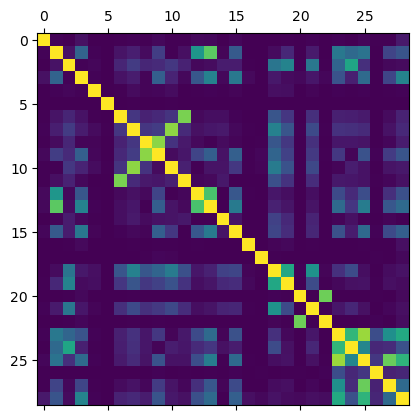

In [15]:
# high_corr_cols = ['Srate', 'fin_flag_number', 'rst_flag_number', 'LLC', 'Std', 'Number', 'Magnitue', 'Radius', 'Weight']
# df.drop(high_corr_cols,axis=1, inplace=True) 
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df.drop(to_drop,axis=1, inplace=True) 
new_corr =  df.iloc[:,:-1].corr().abs()
plt.matshow(new_corr)
plt.show()

In [16]:
scalar = StandardScaler()
sub_df = df # get random 10000 rows 
sub_df = sub_df[~sub_df.isin([np.nan, np.inf, -np.inf]).any(1)] # remove nan, inf, -inf value
scaled_data = pd.DataFrame(scalar.fit_transform(sub_df.iloc[:,1:-1])) 
n_d = 10                        # change
pca = PCA(n_components='mle')   # use PCA to reduce data dimension to n_d
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
X = data_pca.to_numpy()
Y = sub_df.iloc[:,-1].to_numpy()

C:\Users\trung\AppData\Local\Temp\ipykernel_22164\741551516.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  sub_df = sub_df[~sub_df.isin([np.nan, np.inf, -np.inf]).any(1)] # remove nan, inf, -inf value


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=109 )
print(X_train.shape,X_test.shape)

(4514, 27) (446984, 27)


In [18]:
print(Y_test)

['DDoS-RSTFINFlood' 'DDoS-RSTFINFlood' 'DDoS-UDP_Fragmentation' ...
 'DDoS-PSHACK_Flood' 'DoS-UDP_Flood' 'Mirai-greeth_flood']


In [19]:
clf = make_pipeline(StandardScaler(),svm.SVC(kernel="sigmoid",gamma="auto", cache_size=1000))
clf.fit(X_train, Y_train)  # appr 20-30min execution with subdata.csv file ~ 500000 rows
Y_predict = clf.predict(X_test)
print(Y_predict,Y_test)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_predict))

Accuracy: 0.78725
